In [1]:
from scipy.optimize import fsolve, least_squares
import numpy, matplotlib.pyplot as plt

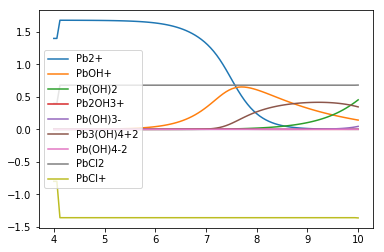

In [13]:
Kw = 10e-14
K1 = 10**(-7.597)
K2 = 10**(-17.094)
K3 = 10**(-28.091)
K4 = 10**(-6.397)
K5 = 10**(-23.888)
K6 = 10**(-39.699)
Kchl2 = 10**(2.2)
Kchl1 = 10**(1.8)
Pb_tot = 80/207.2*1e-3 #M
NO3_m_tot = Pb_tot*2
NaCl = 10/58.44*0 #M


pHs = numpy.linspace(4,10,100)
var0 = [0.999*Pb_tot, 0.0001*Pb_tot, 0.0001*Pb_tot, 0.0001*Pb_tot, 0.0001*Pb_tot, 0.0001*Pb_tot, 0.0001*Pb_tot, 0.8*Pb_tot, NaCl-0.8*Pb_tot, NaCl-0.8*Pb_tot]

list_Pb_2p = []
list_PbOH_m = []
list_PbOH2 = []
list_Pb2OH_3p = []
list_PbOH3_m = []
list_Pb3OH4_2p = []
list_PbOH4_2m = []
list_PbCl2 = []
list_PbCl_p = []

for pH in pHs:

    H_p = 10**(-pH)
    OH_m = Kw/H_p

    def equilibrium(var):
        Pb_2p, PbOH_m, PbOH2, Pb2OH_3p, PbOH3_m, Pb3OH4_2p, PbOH4_2m, PbCl2, Cl_m, PbCl_p = var
        massbalance = Pb_tot - (Pb_2p + PbOH_m + PbOH2 + 2*Pb2OH_3p + PbOH3_m + 3*Pb3OH4_2p + PbOH4_2m + PbCl2 + PbCl_p)
        chlorinebalance = NaCl - (2*PbCl2 + Cl_m + PbCl_p)
        chargebalance = 2*Pb_2p + PbOH_m + H_p + 3*Pb2OH_3p + Pb3OH4_2p - (OH_m + NO3_m_tot + PbOH3_m + 2*PbOH4_2m)
        eq1 = PbOH_m*H_p/Pb_2p - K1
        eq2 = PbOH2*H_p**2/Pb_2p - K2
        eq3 = PbOH3_m*H_p**3/Pb_2p - K3
        eq4 = Pb2OH_3p*H_p/Pb_2p**2 - K4
        eq5 = Pb3OH4_2p*H_p**4/Pb_2p**3 - K5
        eq6 = PbOH4_2m*H_p**4/Pb_2p - K6
        eqcl2 = Pb_2p*Cl_m**2*0  - Kchl2*0
        eqclp = Pb_2p*Cl_m/PbCl_p - Kchl1*0
        
        return [massbalance,
                eq1,
                eq2,
                eq3,
                eq4,
                eq5,
                eq6,
                eqcl2,
                eqclp,
                chlorinebalance]

    Pb_2p, PbOH_m, PbOH2, Pb2OH_3p, PbOH3_m, Pb3OH4_2p, PbOH4_2m, PbCl2, Cl_m, PbCl_p = fsolve(equilibrium,var0)
    var0 = [Pb_2p, PbOH_m, PbOH2, Pb2OH_3p, PbOH3_m, Pb3OH4_2p, PbOH4_2m, PbCl2, Cl_m, PbCl_p]
    list_Pb_2p.append(Pb_2p)
    list_PbOH_m.append(PbOH_m)
    list_PbOH2.append(PbOH2)
    list_Pb2OH_3p.append(Pb2OH_3p)
    list_PbOH3_m.append(PbOH3_m)
    list_Pb3OH4_2p.append(Pb3OH4_2p)
    list_PbOH4_2m.append(PbOH4_2m)
    list_PbCl2.append(PbCl2)
    list_PbCl_p.append(PbCl_p)
    
array_Pb_2p = numpy.array(list_Pb_2p)
array_PbOH_m = numpy.array(list_PbOH_m)
array_PbOH2 = numpy.array(list_PbOH2)
array_Pb2OH_3p = numpy.array(list_Pb2OH_3p)
array_PbOH3_m = numpy.array(list_PbOH3_m)
array_Pb3OH4_2p = numpy.array(list_Pb3OH4_2p)
array_PbOH4_2m = numpy.array(list_PbOH4_2m)
array_PbCl2 = numpy.array(list_PbCl2)
array_PbCl_p = numpy.array(list_PbCl_p)


    
plt.plot(pHs, (array_Pb_2p/Pb_tot),label='Pb2+')
plt.plot(pHs, (array_PbOH_m/Pb_tot), label = 'PbOH+') 
plt.plot(pHs, (array_PbOH2/Pb_tot), label='Pb(OH)2')
plt.plot(pHs, array_Pb2OH_3p/Pb_tot,label='Pb2OH3+')
plt.plot(pHs, array_PbOH3_m/Pb_tot, label='Pb(OH)3-')
plt.plot(pHs, array_Pb3OH4_2p/Pb_tot, label = 'Pb3(OH)4+2')
plt.plot(pHs, array_PbOH4_2m/Pb_tot, label='Pb(OH)4-2')
plt.plot(pHs, array_PbCl2/Pb_tot, label='PbCl2')
plt.plot(pHs, array_PbCl_p/Pb_tot, label='PbCl+')
plt.legend()
plt.show()

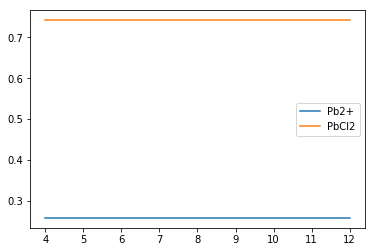

(9.968170060093744e-05, 0.0002864186854994487)

In [3]:
Kw = 10e-14
K1 = 10**(-7.597)
K2 = 10**(-17.094)
K3 = 10**(-28.091)
K4 = 10**(-6.397)
K5 = 10**(-23.888)
K6 = 10**(-39.699)
K5b = 7.94e-33

Pb_tot = 80/207.2*1e-3 #M
NO3_m_tot = Pb_tot*2
NaCl = 10/58.44 #M
pH = 6

pHs = numpy.linspace(4,12,100)
var0 = [0.999*Pb_tot, 1, 1]

list_Pb_2p = []
list_PbOH_m = []
list_PbOH2 = []
list_Pb2OH_3p = []
list_PbOH3_m = []
Pb_tott_Pb3OH4_2p = []
list_PbOH4_2m = []
list_PbCl2 = []

for pH in pHs:

    H_p = 10**(-pH)
    OH_m = Kw/H_p

    def equilibrium(var):
        Pb_2p, PbCl2, Cl_m = var
        massbalance = Pb_tot - (Pb_2p + PbCl2)
        chlorinebalance = NaCl - (2*PbCl2 + Cl_m)
#         chargebalance = 2*Pb_2p + OH_m + H_p + 3*Pb2OH_3p + Pb3OH4_2p - (OH_m + NO3_m_tot + PbOH3_m + 2*PbOH4_2m)
        eqcl2 = Pb_2p*Cl_m - Kchl2
        
#         eq5b = (Pb_2p**3)*OH_m**4/Pb3OH4_2p - K5b

        return [massbalance,
                eqcl2,
                chlorinebalance]

    Pb_2p, PbCl2, Cl_m = fsolve(equilibrium,var0)
    var0 = [Pb_2p, PbCl2, Cl_m]
    list_Pb_2p.append(Pb_2p)
    list_PbCl2.append(PbCl2)
    
array_Pb_2p = numpy.array(list_Pb_2p)
array_PbCl2 = numpy.array(list_PbCl2)

    
plt.plot(pHs, array_Pb_2p/Pb_tot,label='Pb2+')
plt.plot(pHs, array_PbCl2/Pb_tot, label='PbCl2')
plt.legend()

plt.show()

array_Pb_2p[0], array_PbCl2[0]